<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/PCA_KMeans_SocialEnvironment_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded1 = files.upload() #choose file dados_relativizados_carcinicultura.csv



Saving dados_relativizados_centralizados_carcinicultura.csv to dados_relativizados_centralizados_carcinicultura.csv


In [6]:
#Upload data from cvs file
df1 = pd.read_csv(io.StringIO(uploaded1['dados_relativizados_centralizados_carcinicultura.csv'].decode('utf-8'))) 
print(df1)

    Unnamed: 0         cultura  ...    S19_IR    S20_IE
0            0  Carcinicultura  ... -0.015126 -0.181345
1            1  Carcinicultura  ... -3.007332  1.033912
2            2  Carcinicultura  ...  0.028468 -1.738392
3            3  Carcinicultura  ...  0.168525 -0.540663
4            4  Carcinicultura  ...  0.038207 -0.549427
5            5  Carcinicultura  ...  0.245973 -0.540663
6            6  Carcinicultura  ...  0.068815  1.393230
7            7  Carcinicultura  ... -0.217791 -0.937959
8            8  Carcinicultura  ... -0.385673 -1.043125
9            9  Carcinicultura  ... -0.217791  1.895692
10          10  Carcinicultura  ...  1.097908  0.402913
11          11  Carcinicultura  ...  1.097908  0.402913
12          12  Carcinicultura  ...  1.097908  0.402913

[13 rows x 50 columns]


In [7]:
column_names = df1.columns

#Select fatores Sociais e Ambientais
feature_names = [name for name in column_names if( name.startswith("S")|name.startswith("A"))] 

#feature_names = list(df.columns["E1_RRLII":"E13_DM"])
#print(feature_names)
list_names = ['cultivo'] + feature_names
df_cultivo_1 = df1[list_names]
df_cultivo_1.head()



,cultivo,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A11_PEPN,A12_PPO,A19_AF,A20_AMO,A22_REC,A1_PRC,A2_PRN,A3_PRF,A4_EUC,S1_DEL,S2_UMOL,S3_RTUP,S3_RTUP.1,S4_EDGI,S6_PA,S7_PA,S8_TRUAO,S9_TRUP,S10_SLT,S11_CLP,S13_CPT,S14_DR,S15_APS,S16_E,S17_PAC,S18_IG,S19_IR,S20_IE
0,M. rosenbergii - Espirito Santo-,-0.758457,-0.486930,-0.925341,1.523464,3.361357,-0.981900,1.548494,0.288406,0.899046,0.005799,-0.035433,0.288675,5.970000e-10,1.760000e-10,1.450000e-10,-3.354904,3.435828,-1.066987,-0.199190,-0.326474,-0.382908,1.777040,-1.078517,2.007685,-0.746154,-2.865112,3.253395,-1.077251,-0.632771,3.463754,-0.786190,-0.547723,-1.614284,-0.015126,-0.181345
1,P. vannamei - Sergipe - Semi intensivo,-0.508045,-0.485603,0.273754,-0.409546,0.339940,2.538890,2.031101,0.435067,1.625857,-0.064077,-0.079352,-3.464102,-3.005706e+00,-2.281014e+00,-1.695427e+00,0.990997,-0.394728,0.671476,3.363483,-0.316466,-0.406004,0.961309,-0.073856,-1.156982,2.590560,-0.797934,-0.662433,0.386925,1.712666,-0.301291,2.243712,-0.547723,2.435664,-3.007332,1.033912
2,L. vannamei - Aquafort,-0.494140,-0.486010,0.762122,-0.225905,-0.495083,0.292514,0.809588,-0.734712,-0.413912,-0.428646,-0.618300,0.288675,1.204142e-01,8.797816e-01,6.545044e-01,0.322879,-0.028327,0.529238,-0.523894,-0.601030,-0.593053,-1.407373,1.236002,-0.475027,0.751090,0.649301,0.120472,-1.092631,-0.870714,-0.297869,0.546967,-0.547723,-0.311308,0.028468,-1.738392
3,L. vannamei - Northern,-0.464100,-0.486159,0.126027,-0.435625,-0.683614,-0.870315,-0.245603,-0.888383,-1.370484,-0.094458,0.533875,0.288675,1.336618e+00,-1.179946e-01,1.825333e+00,0.071943,-0.183770,0.671476,-0.384217,-0.505275,-0.534305,-1.264620,-0.073856,1.285567,1.339293,0.649301,0.120472,-0.585091,-0.462812,-0.296728,-0.786190,-0.547723,-0.506681,0.168525,-0.540663
4,L. vannamei - Aquacrusta,-0.274286,-0.485371,0.659405,-0.751543,-0.169375,-1.310781,-0.747296,1.795601,-0.167502,3.080332,0.471207,0.288675,5.632915e-01,1.674473e+00,7.846607e-01,0.037439,-0.368821,0.671476,-0.547476,-0.567991,-0.567760,-1.288072,2.545860,-0.344358,0.184276,0.649301,0.120472,-1.174914,-0.870714,-0.297869,-0.382607,-0.547723,-0.367129,0.038207,-0.549427


In [8]:
#Load data from Piscultura
from google.colab import files
uploaded2 = files.upload() #choose file dados_relativizados_centralizados_piscicultura.csv

Saving dados_relativizados_centralizados_piscicultura.csv to dados_relativizados_centralizados_piscicultura.csv


In [10]:
#Upload data from cvs file
df2 = pd.read_csv(io.StringIO(uploaded2['dados_relativizados_centralizados_piscicultura.csv'].decode('utf-8'))) 
#print(df2)

column_names = df2.columns
#Select fatores Sociais e Ambientais
feature_names = [name for name in column_names if( name.startswith("S")|name.startswith("A"))] 


#feature_names = list(df.columns["E1_RRLII":"E13_DM"])
#print(feature_names)
list_names = ['cultivo'] + feature_names
df_cultivo_2 = df2[list_names]
df_cultivo_2.head()


,cultivo,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC,S1_DEL,S2_UMOL,S3_RTUP,S6_PA,S8_TRUAO,S9_TRUP,S10_SLT,S11_CLP,S13_CPT,S14_DR,S18_IG,S19_IR,S20_IE
0,Truta - race-way,3.122172e+00,-0.557896,-0.561669,-0.197903,0.483326,1.267756,-0.227593,-1.335571e+00,-0.756929,-1.015822e+00,-1.230752e+00,-3.316625,-0.820968,-9.510976e-01,-0.891009,-0.664629,1.876659e+00,-1.994385,-0.021043,-1.626074e+00,2.211263e+00,2.686547e+00,5.807265e-01
1,Tilapia - gaiolas - SP - sem restricao alimentar,1.410000e-10,1.955370,1.146380,-0.310220,1.961236,1.383958,2.095118,-9.420000e-11,-0.756929,1.597613e+00,-1.620000e-11,0.301511,-1.034860,1.000000e-10,-0.879577,-0.663891,-1.361383e+00,0.000000,-0.167998,-6.640000e-11,-1.040000e-10,1.110000e-10,-1.060000e-10
2,Tilapia - gaiolas - SP - com restricao alimentar,1.410000e-10,2.316823,1.284580,-0.285437,2.219217,1.498797,2.158006,-9.420000e-11,-0.756929,2.078678e+00,-1.620000e-11,0.301511,-1.022196,1.000000e-10,-0.881077,-0.664021,-1.361383e+00,0.000000,-0.200682,-6.640000e-11,-1.040000e-10,1.110000e-10,-1.060000e-10
3,Tilapia - gaiola - RS,3.775720e-01,-0.288911,2.504503,3.256382,-0.439364,-0.555705,0.129240,-9.420000e-11,-0.756929,3.150000e-16,-1.620000e-11,0.301511,0.065737,1.000000e-10,-0.010477,-0.105938,4.380000e-11,0.000000,0.081590,-6.640000e-11,-1.040000e-10,1.110000e-10,-1.060000e-10
4,Tambatinga - viveiro 2,-7.745291e-03,-0.547845,-0.551644,-0.334452,-0.696611,-1.312654,-0.710166,2.676561e+00,-0.621360,3.150000e-16,-1.201980e+00,0.301511,-0.723105,1.090559e+00,0.115245,1.165317,4.380000e-11,0.809002,-0.897488,3.625247e-01,-8.896315e-01,-7.788328e-01,-1.011749e+00


In [11]:
#Merge only rows that have the same column names
df_cultivo = pd.concat([df_cultivo_1, df_cultivo_2], axis=0, join="inner",ignore_index=True)
print(df_cultivo.columns)
#combined_df.dropna(axis=1)
#print(combined_df["S7_PA"])
df_cultivo

Index(['cultivo', 'A2_DA', 'A3_UE', 'A5_UN', 'A6_UF', 'A7_EUE', 'A8_EUN',
       'A9_EUF', 'A12_PPO', 'A22_REC', 'A4_EUC', 'S1_DEL', 'S2_UMOL',
       'S3_RTUP', 'S6_PA', 'S8_TRUAO', 'S9_TRUP', 'S10_SLT', 'S11_CLP',
       'S13_CPT', 'S14_DR', 'S18_IG', 'S19_IR', 'S20_IE'],
      dtype='object')


,cultivo,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC,S1_DEL,S2_UMOL,S3_RTUP,S6_PA,S8_TRUAO,S9_TRUP,S10_SLT,S11_CLP,S13_CPT,S14_DR,S18_IG,S19_IR,S20_IE
0,M. rosenbergii - Espirito Santo-,-7.584569e-01,-0.486930,-0.925341,1.523464,3.361357,-0.981900,1.548494,8.990461e-01,0.288675,-3.354904e+00,3.435828e+00,-1.066987,-0.199190,1.777040e+00,2.007685,-0.746154,-2.865112e+00,3.253395,-1.077251,-6.327711e-01,-1.614284e+00,-1.512585e-02,-1.813446e-01
1,P. vannamei - Sergipe - Semi intensivo,-5.080451e-01,-0.485603,0.273754,-0.409546,0.339940,2.538890,2.031101,1.625857e+00,-3.464102,9.909967e-01,-3.947281e-01,0.671476,3.363483,9.613086e-01,-1.156982,2.590560,-7.979341e-01,-0.662433,0.386925,1.712666e+00,2.435664e+00,-3.007332e+00,1.033912e+00
2,L. vannamei - Aquafort,-4.941398e-01,-0.486010,0.762122,-0.225905,-0.495083,0.292514,0.809588,-4.139118e-01,0.288675,3.228792e-01,-2.832704e-02,0.529238,-0.523894,-1.407373e+00,-0.475027,0.751090,6.493015e-01,0.120472,-1.092631,-8.707140e-01,-3.113085e-01,2.846798e-02,-1.738392e+00
3,L. vannamei - Northern,-4.640998e-01,-0.486159,0.126027,-0.435625,-0.683614,-0.870315,-0.245603,-1.370484e+00,0.288675,7.194307e-02,-1.837699e-01,0.671476,-0.384217,-1.264620e+00,1.285567,1.339293,6.493015e-01,0.120472,-0.585091,-4.628119e-01,-5.066814e-01,1.685248e-01,-5.406632e-01
4,L. vannamei - Aquacrusta,-2.742864e-01,-0.485371,0.659405,-0.751543,-0.169375,-1.310781,-0.747296,-1.675020e-01,0.288675,3.743935e-02,-3.688209e-01,0.671476,-0.547476,-1.288072e+00,-0.344358,0.184276,6.493015e-01,0.120472,-1.174914,-8.707140e-01,-3.671293e-01,3.820703e-02,-5.494271e-01
5,L. vannamei - HM,-2.693047e-01,-0.485612,0.638636,-0.633485,-0.277006,0.809328,0.365154,-1.280953e+00,0.288675,2.444617e-01,-1.264041e-01,0.671476,-0.464939,-9.699365e-01,-0.069265,0.146845,6.493015e-01,0.120472,-0.497425,-7.347466e-01,-7.519993e-01,2.459734e-01,-5.406632e-01
6,L. vannamei - Ilha,4.688350e-03,-0.485826,-0.089000,-0.662892,-0.402224,1.011942,0.130667,-8.975311e-01,0.288675,4.483473e-01,-3.854755e-01,0.671476,-0.427752,-5.681886e-01,0.054527,-0.115173,6.493015e-01,0.120472,-0.472817,-5.647874e-01,5.069074e-01,6.881546e-02,1.393230e+00
7,L. vannamei - Carpixe,1.014354e+00,-0.485467,0.277971,-0.722049,-0.198217,0.251404,-0.515536,-1.013961e-01,0.288675,5.312286e-02,-4.224857e-01,0.671476,-0.295331,9.613086e-01,0.914191,-0.585735,6.493015e-01,-0.271143,0.948295,-4.628119e-01,-1.241166e+00,-2.177908e-01,-9.379585e-01
8,L. vannamei - Marinus,1.348885e+00,-0.485625,1.550973,-0.517750,-0.279820,0.357116,0.457858,-1.181226e-01,0.288675,5.173547e-01,-2.966510e-01,0.671476,-0.365170,-3.132724e-01,0.735381,-0.136562,6.493015e-01,-0.271143,0.155456,-5.307956e-01,1.117999e+00,-3.856734e-01,-1.043125e+00
9,L. vannamei - Aquabrasilis,2.648823e+00,-0.485523,-0.199183,-0.930004,0.002273,-0.315328,-0.136539,2.129743e+00,0.288675,1.629074e-01,-5.076092e-01,0.671476,-0.513010,2.475432e-01,0.508430,-0.794279,6.493015e-01,-0.662759,-0.971898,-8.027303e-01,5.950456e-01,-2.177908e-01,1.895692e+00


In [12]:
#Look at correlations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cultivo.corr()

# using a styled panda's dataframe from https://stackoverflow.com/a/42323184/1215012
cmap = 'coolwarm'

def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover", 
                 props=[('max-width', '200px'), ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC,S1_DEL,S2_UMOL,S3_RTUP,S6_PA,S8_TRUAO,S9_TRUP,S10_SLT,S11_CLP,S13_CPT,S14_DR,S18_IG,S19_IR,S20_IE
A2_DA,1.00,-0.18,0.19,-0.21,0.05,0.21,0.05,0.07,-0.16,0.04,-0.39,-0.19,-0.34,-0.09,-0.02,-0.20,0.50,-0.39,-0.11,-0.40,0.44,0.31,0.23
A3_UE,-0.18,1.00,-0.08,0.23,0.33,0.13,0.14,-0.05,-0.13,0.44,-0.06,-0.35,-0.20,0.26,-0.52,-0.39,-0.34,-0.11,0.43,0.46,0.09,0.33,0.22
A5_UN,0.19,-0.08,1.00,0.21,0.13,0.29,0.48,-0.03,-0.23,0.43,-0.12,0.45,-0.17,-0.27,-0.02,0.09,0.06,-0.05,-0.19,-0.24,0.09,-0.18,-0.21
A6_UF,-0.21,0.23,0.21,1.00,0.14,-0.26,-0.07,0.06,-0.07,-0.22,0.24,-0.40,0.01,0.27,-0.09,-0.24,-0.32,0.14,0.32,0.32,-0.05,0.28,0.09
A7_EUE,0.05,0.33,0.13,0.14,1.00,0.31,0.74,0.14,-0.20,-0.10,0.50,-0.19,-0.16,0.31,0.10,-0.27,-0.66,0.40,-0.13,-0.16,-0.06,0.02,0.06
A8_EUN,0.21,0.13,0.29,-0.26,0.31,1.00,0.64,-0.05,-0.31,0.38,0.02,0.05,0.28,-0.06,-0.17,-0.06,-0.04,-0.23,0.12,-0.06,0.52,-0.18,0.22
A9_EUF,0.05,0.14,0.48,-0.07,0.74,0.64,1.00,0.14,-0.48,0.27,0.26,0.26,0.01,0.08,0.03,0.12,-0.40,0.26,-0.19,-0.10,0.22,-0.33,0.04
A12_PPO,0.07,-0.05,-0.03,0.06,0.14,-0.05,0.14,1.00,-0.23,-0.10,0.09,0.17,0.14,0.38,0.10,0.03,-0.27,0.25,-0.07,0.29,0.05,-0.43,0.21
A22_REC,-0.16,-0.13,-0.23,-0.07,-0.20,-0.31,-0.48,-0.23,1.00,-0.38,0.46,0.01,-0.14,-0.18,0.53,-0.55,0.03,0.23,0.01,-0.36,-0.51,0.29,-0.20
A4_EUC,0.04,0.44,0.43,-0.22,-0.10,0.38,0.27,-0.10,-0.38,1.00,-0.56,0.33,-0.05,-0.08,-0.49,0.19,0.11,-0.40,0.17,0.17,0.29,-0.16,0.01


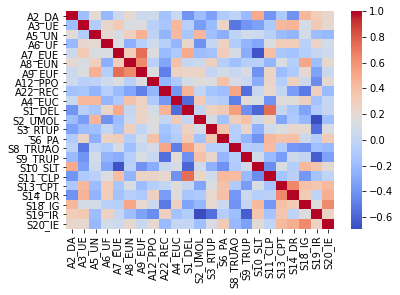

In [13]:
#smaller chart
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [14]:
#check which ones are statiscally significant
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_values = calculate_pvalues(df_cultivo)


In [15]:
#Plot p-values
def highlight_significant(val):
    '''
    highlight in blue only the statistically significant cells
    '''
    color = 'blue' if val < 0.05 else 'grey'
    return 'color: %s' % color

p_values.style.applymap(highlight_significant)

,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC,S1_DEL,S2_UMOL,S3_RTUP,S6_PA,S8_TRUAO,S9_TRUP,S10_SLT,S11_CLP,S13_CPT,S14_DR,S18_IG,S19_IR,S20_IE
A2_DA,0.000000,0.393400,0.353100,0.318600,0.809900,0.306900,0.804800,0.740800,0.452700,0.838200,0.051800,0.356200,0.098000,0.655200,0.924300,0.332500,0.010100,0.054800,0.608000,0.048300,0.026500,0.129600,0.268300
A3_UE,0.393400,0.000000,0.714400,0.264100,0.105800,0.544500,0.493900,0.830500,0.533300,0.028700,0.777100,0.082600,0.339400,0.217100,0.008100,0.051900,0.093700,0.612800,0.033300,0.021000,0.659700,0.102200,0.293600
A5_UN,0.353100,0.714400,0.000000,0.315900,0.551300,0.158700,0.016400,0.898900,0.259400,0.031300,0.560800,0.023600,0.411400,0.193100,0.930700,0.678200,0.770200,0.819800,0.351200,0.257800,0.669800,0.384400,0.307000
A6_UF,0.318600,0.264100,0.315900,0.000000,0.508400,0.207800,0.746600,0.760100,0.747600,0.287300,0.239200,0.048000,0.956600,0.185400,0.681800,0.248700,0.120000,0.499600,0.120500,0.122300,0.802800,0.179900,0.673300
A7_EUE,0.809900,0.105800,0.551300,0.508400,0.000000,0.132100,0.000000,0.491800,0.333500,0.626300,0.011100,0.355500,0.452100,0.136200,0.618300,0.184700,0.000300,0.046600,0.526800,0.446400,0.767000,0.911200,0.781300
A8_EUN,0.306900,0.544500,0.158700,0.207800,0.132100,0.000000,0.000600,0.815000,0.125300,0.058600,0.935200,0.827400,0.172600,0.764200,0.407000,0.766100,0.840600,0.266000,0.575000,0.758500,0.007300,0.402300,0.296100
A9_EUF,0.804800,0.493900,0.016400,0.746600,0.000000,0.000600,0.000000,0.502600,0.015100,0.193900,0.213100,0.212500,0.967800,0.690100,0.902200,0.566800,0.048200,0.213500,0.361100,0.633900,0.301200,0.110300,0.848800
A12_PPO,0.740800,0.830500,0.898900,0.760100,0.491800,0.815000,0.502600,0.000000,0.263100,0.641400,0.667800,0.420400,0.502200,0.060100,0.646100,0.876700,0.185300,0.230700,0.750400,0.164900,0.825600,0.032000,0.320900
A22_REC,0.452700,0.533300,0.259400,0.747600,0.333500,0.125300,0.015100,0.263100,0.000000,0.061300,0.021000,0.966900,0.494500,0.395200,0.007000,0.004100,0.897200,0.278300,0.964200,0.076400,0.009100,0.160300,0.327800
A4_EUC,0.838200,0.028700,0.031300,0.287300,0.626300,0.058600,0.193900,0.641400,0.061300,0.000000,0.003500,0.103400,0.828900,0.705200,0.012800,0.369100,0.600600,0.045700,0.427200,0.403000,0.164800,0.451600,0.947600


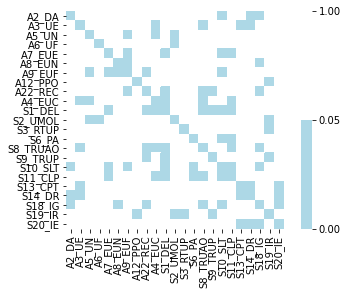

In [16]:
#Smaller plot of p-values
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

np.random.seed(101)
zvals = np.random.rand(100, 100) * 10

# make a color map of fixed colors
cmap_discrete = colors.ListedColormap(['lightblue', 'white'])
bounds=[0,0.05,1]
norm_binary = colors.BoundaryNorm(bounds, cmap_discrete.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap_discrete, norm=norm_binary)

sns.heatmap(p_values, xticklabels=p_values.columns, yticklabels=p_values.columns, cmap=cmap_discrete, norm=norm_binary)

**PCA** 
Now we do the PCA 

In [17]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)
x.shape


(25, 23)

In [18]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

df_components = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])

df_components = pd.concat([df_cultivo['cultivo'],df_components], axis = 1)

['M. rosenbergii - Espirito Santo-'
 'P. vannamei - Sergipe - Semi intensivo' 'L. vannamei - Aquafort'
 'L. vannamei - Northern' 'L. vannamei - Aquacrusta' 'L. vannamei - HM'
 'L. vannamei - Ilha' 'L. vannamei - Carpixe' 'L. vannamei - Marinus'
 'L. vannamei - Aquabrasilis' 'L. vannamei - Aquarium - baixa densid.'
 'L. vannamei - Aquarium - alta densis'
 'L. vannamei - Aquarium-  bifasico' 'Truta - race-way'
 'Tilapia - gaiolas - SP -  sem restricao alimentar'
 'Tilapia - gaiolas - SP - com restricao alimentar'
 'Tilapia - gaiola - RS' 'Tambatinga - viveiro 2'
 'Tambatinga - viveiro 23' 'Tambatinga - viveiro 250'
 'Tambaqui - M amazonicum - policultivo - SP' 'Tilapia - tanque rede - RN'
 'Lambari - semi intensivo - baixo controle'
 'Lambari - semi intensivo - médio controle'
 'Lambari - semi intensivo - alto controle']


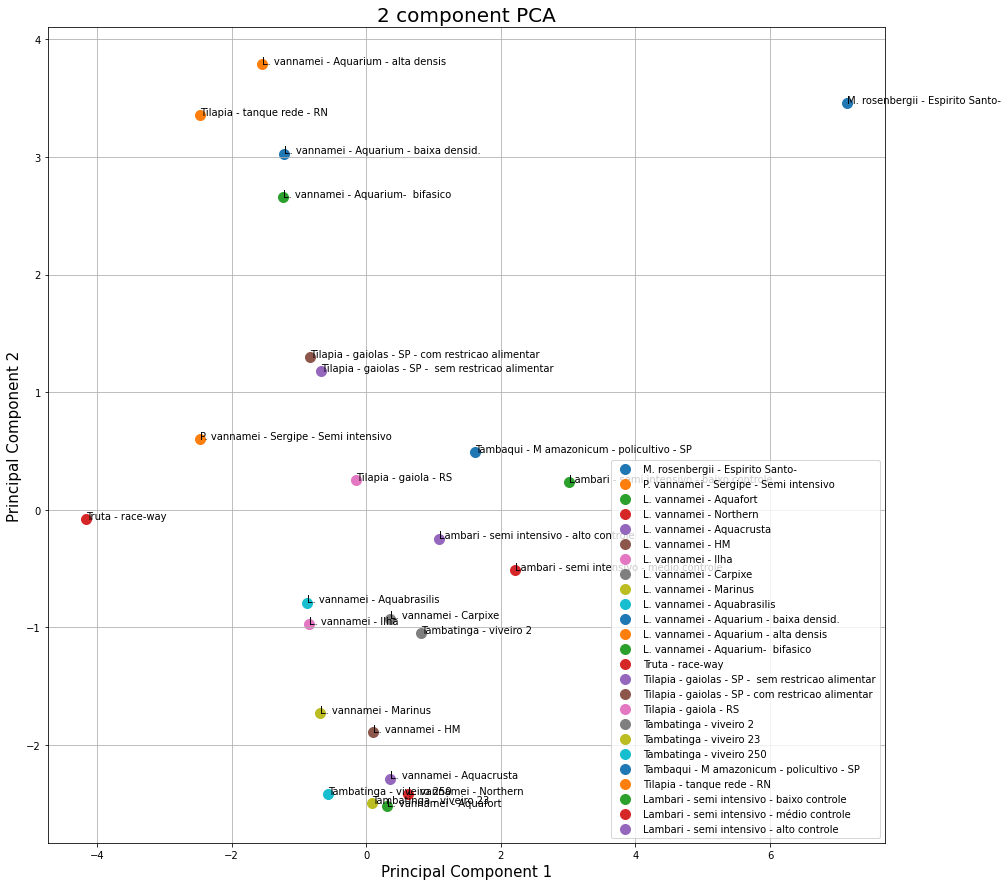

In [19]:
#Visualize results of PCA in Two Dimensions
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = df_components['cultivo'] == target
    x = df_components.loc[indicesToKeep, 'principal component 1']
    y = df_components.loc[indicesToKeep, 'principal component 2']
    ax.scatter(x,y,s = 100)
    ax.annotate(target, (x,y))

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [20]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.18896239 0.16971992]
total variance explained: 0.3586823131389756


In [21]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1])}, columns=['cultivo', 'pc1','pc2'])
#df_clustering

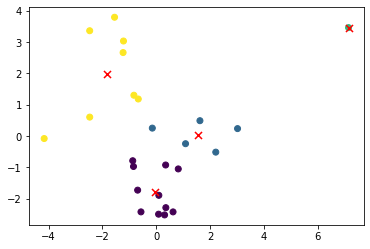

In [22]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

In [23]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
2,L. vannamei - Aquafort,0.309849,-2.518192,0
3,L. vannamei - Northern,0.623920,-2.421822,0
4,L. vannamei - Aquacrusta,0.356607,-2.286702,0
5,L. vannamei - HM,0.096405,-1.893248,0
6,L. vannamei - Ilha,-0.845326,-0.973342,0
7,L. vannamei - Carpixe,0.348897,-0.926051,0
8,L. vannamei - Marinus,-0.691086,-1.727963,0
9,L. vannamei - Aquabrasilis,-0.873601,-0.789680,0
19,Tambatinga - viveiro 250,-0.567347,-2.421403,0
18,Tambatinga - viveiro 23,0.086870,-2.494873,0


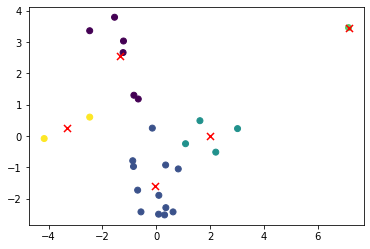

In [24]:
#5 clusters
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50,  marker='x', color="red"); # Show the 


In my view, we have two large clusters and three outliers, as the graph above shows.

In [25]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
12,L. vannamei - Aquarium- bifasico,-1.231652,2.661031,0
15,Tilapia - gaiolas - SP - com restricao alimentar,-0.830108,1.299664,0
14,Tilapia - gaiolas - SP - sem restricao alimentar,-0.667946,1.179821,0
21,Tilapia - tanque rede - RN,-2.472457,3.357469,0
11,L. vannamei - Aquarium - alta densis,-1.548586,3.787610,0
10,L. vannamei - Aquarium - baixa densid.,-1.216849,3.029477,0
17,Tambatinga - viveiro 2,0.817986,-1.050963,1
16,Tilapia - gaiola - RS,-0.145851,0.250908,1
18,Tambatinga - viveiro 23,0.086870,-2.494873,1
9,L. vannamei - Aquabrasilis,-0.873601,-0.789680,1


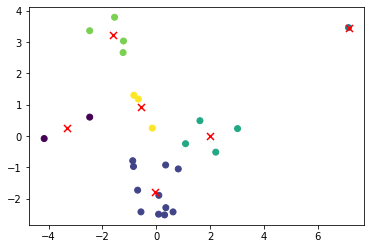

In [26]:
#6 clusters
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

#7 clusters

In [27]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
1,P. vannamei - Sergipe - Semi intensivo,-2.471485,0.601652,0
13,Truta - race-way,-4.163416,-0.081706,0
2,L. vannamei - Aquafort,0.309849,-2.518192,1
3,L. vannamei - Northern,0.623920,-2.421822,1
4,L. vannamei - Aquacrusta,0.356607,-2.286702,1
5,L. vannamei - HM,0.096405,-1.893248,1
6,L. vannamei - Ilha,-0.845326,-0.973342,1
7,L. vannamei - Carpixe,0.348897,-0.926051,1
8,L. vannamei - Marinus,-0.691086,-1.727963,1
9,L. vannamei - Aquabrasilis,-0.873601,-0.789680,1


In [28]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
1,P. vannamei - Sergipe - Semi intensivo,-2.471485,0.601652,0
13,Truta - race-way,-4.163416,-0.081706,0
2,L. vannamei - Aquafort,0.309849,-2.518192,1
3,L. vannamei - Northern,0.623920,-2.421822,1
4,L. vannamei - Aquacrusta,0.356607,-2.286702,1
5,L. vannamei - HM,0.096405,-1.893248,1
6,L. vannamei - Ilha,-0.845326,-0.973342,1
7,L. vannamei - Carpixe,0.348897,-0.926051,1
8,L. vannamei - Marinus,-0.691086,-1.727963,1
9,L. vannamei - Aquabrasilis,-0.873601,-0.789680,1


Now we analyze 3 Principal Components



In [29]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)

In [30]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df_cultivo[['cultivo']]], axis = 1)

In [31]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])}, columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

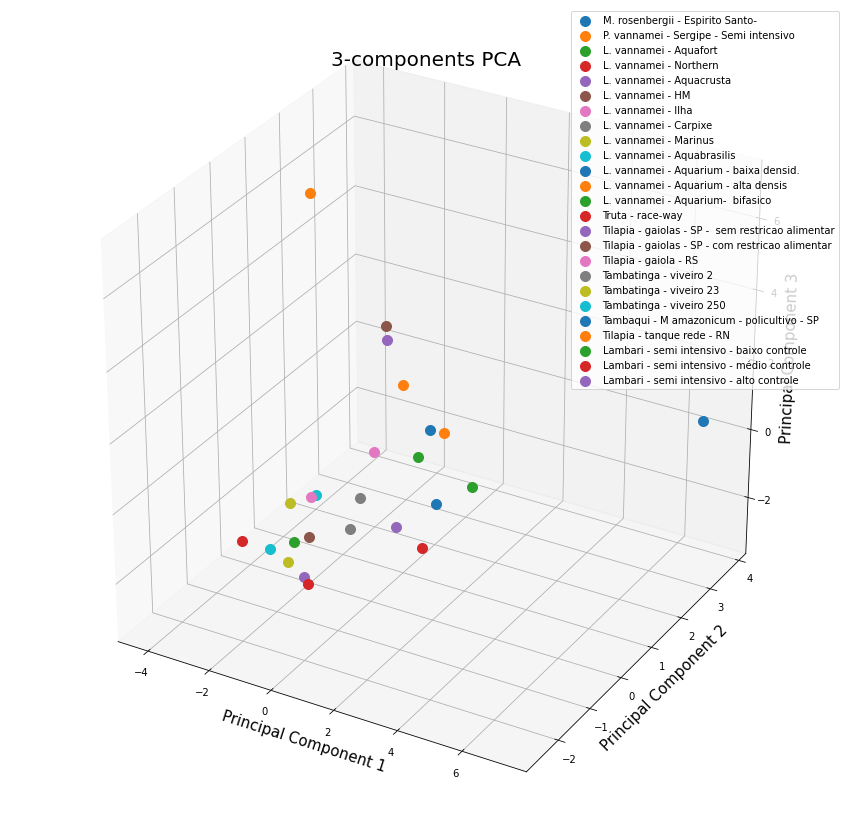

In [32]:
#Visualize results of PCA in Three Dimensions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    
ax.legend(targets)
ax.grid()

In [33]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))

variance explained by each component: [0.18896239 0.16971992 0.15692714]
total variance explained: 0.5156094549676408


Now we search for clusters for 3 principal components

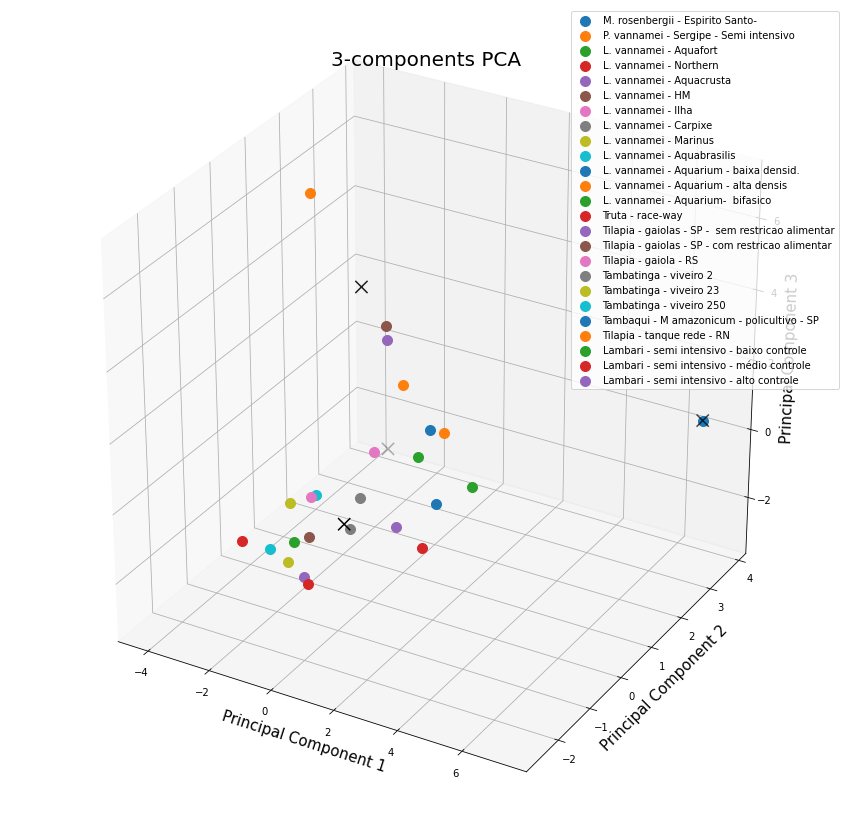

In [34]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
   
ax.legend(targets)
ax.grid()

In [35]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]),
                              'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])},
                              columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

In [36]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')


,cultivo,pc1,pc2,pc3,cluster
1,P. vannamei - Sergipe - Semi intensivo,-2.471485,0.601652,6.878513,0
15,Tilapia - gaiolas - SP - com restricao alimentar,-0.830108,1.299664,3.074701,0
14,Tilapia - gaiolas - SP - sem restricao alimentar,-0.667946,1.179821,2.799571,0
0,M. rosenbergii - Espirito Santo-,7.142908,3.457230,0.673956,1
21,Tilapia - tanque rede - RN,-2.472457,3.357469,-0.619077,2
13,Truta - race-way,-4.163416,-0.081706,-2.957713,2
11,L. vannamei - Aquarium - alta densis,-1.548586,3.787610,-2.156207,2
10,L. vannamei - Aquarium - baixa densid.,-1.216849,3.029477,-1.391318,2
12,L. vannamei - Aquarium- bifasico,-1.231652,2.661031,-1.914732,2
9,L. vannamei - Aquabrasilis,-0.873601,-0.789680,-0.146396,3


Comparing k-means of PC12 with PC123, we see that the cluster membership changes completely.

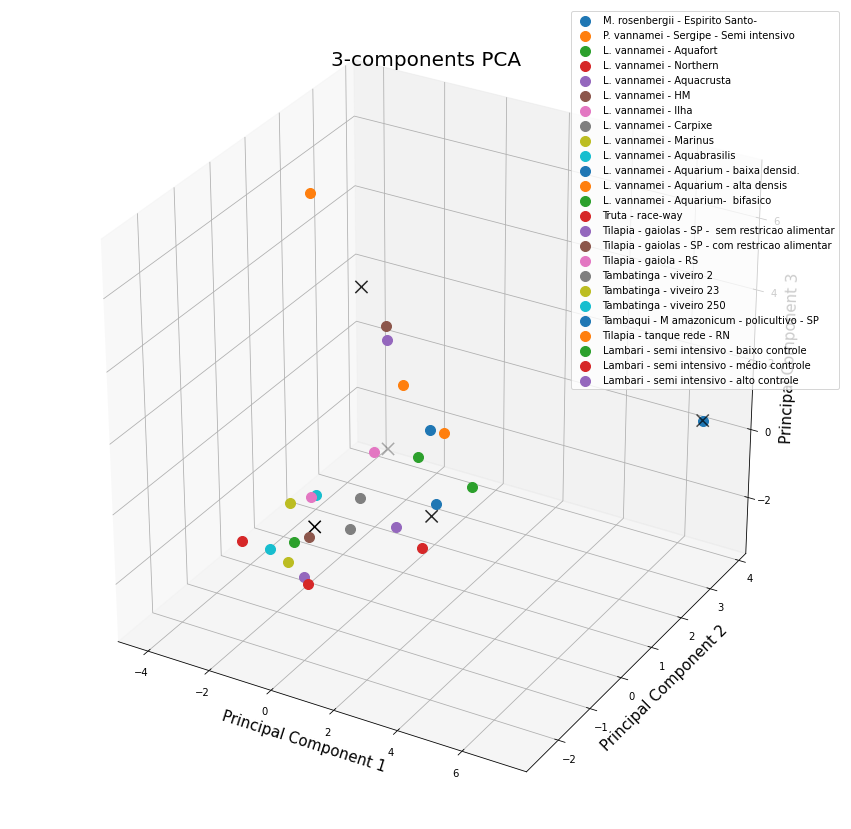

In [37]:
#5 clusters 
from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    #ax.annotate(target, (x,y))

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [38]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
0,M. rosenbergii - Espirito Santo-,7.142908,3.457230,0.673956,0
22,Lambari - semi intensivo - baixo controle,3.019956,0.235419,0.287801,1
20,Tambaqui - M amazonicum - policultivo - SP,1.622902,0.487790,-0.786049,1
23,Lambari - semi intensivo - médio controle,2.211069,-0.515566,-1.057390,1
24,Lambari - semi intensivo - alto controle,1.088342,-0.246560,-0.978547,1
12,L. vannamei - Aquarium- bifasico,-1.231652,2.661031,-1.914732,2
21,Tilapia - tanque rede - RN,-2.472457,3.357469,-0.619077,2
13,Truta - race-way,-4.163416,-0.081706,-2.957713,2
10,L. vannamei - Aquarium - baixa densid.,-1.216849,3.029477,-1.391318,2
11,L. vannamei - Aquarium - alta densis,-1.548586,3.787610,-2.156207,2


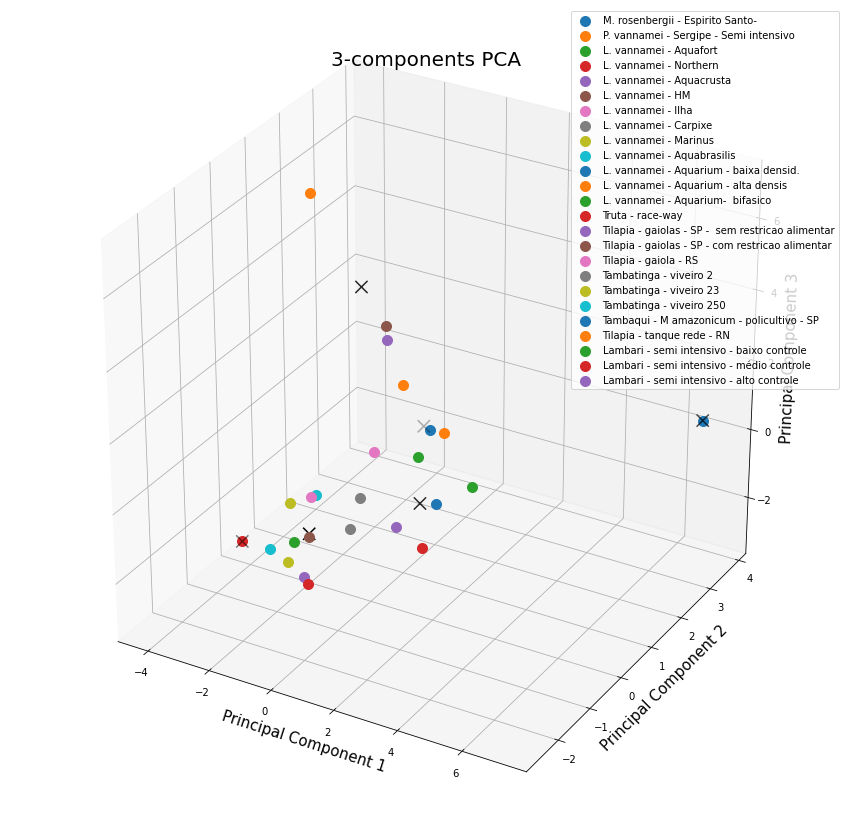

In [39]:
#6 clusters 
from sklearn.cluster import KMeans
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
    
ax.legend(targets)
ax.grid()

In [40]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
2,L. vannamei - Aquafort,0.309849,-2.518192,0.277183,0
3,L. vannamei - Northern,0.623920,-2.421822,-0.926333,0
4,L. vannamei - Aquacrusta,0.356607,-2.286702,-0.890389,0
5,L. vannamei - HM,0.096405,-1.893248,-0.157146,0
6,L. vannamei - Ilha,-0.845326,-0.973342,-0.046398,0
7,L. vannamei - Carpixe,0.348897,-0.926051,-0.662335,0
8,L. vannamei - Marinus,-0.691086,-1.727963,0.461601,0
9,L. vannamei - Aquabrasilis,-0.873601,-0.789680,-0.146396,0
19,Tambatinga - viveiro 250,-0.567347,-2.421403,-0.244906,0
18,Tambatinga - viveiro 23,0.086870,-2.494873,-0.386925,0
